In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import *

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch data set from local disk

In [4]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-07_2224_state_daily_data.csv 2020-04-10_2050_state_daily_data.csv
2020-04-07_2224_state_rank.csv       2020-04-10_2050_state_rank.csv
2020-04-08_2053_state_daily_data.csv 2020-04-11_1640_state_daily_data.csv
2020-04-08_2053_state_rank.csv       2020-04-11_1640_state_rank.csv
2020-04-09_1613_state_daily_data.csv 2020-04-12_0306_state_daily_data.csv
2020-04-09_1613_state_rank.csv       2020-04-12_0306_state_rank.csv
2020-04-10_1539_state_daily_data.csv 2020-04-12_0320_state_daily_data.csv
2020-04-10_1539_state_rank.csv       2020-04-12_0320_state_rank.csv
2020-04-10_1555_state_daily_data.csv 2020-04-13_1537_state_daily_data.csv
2020-04-10_1555_state_rank.csv       2020-04-13_1537_state_rank.csv
Latest files are:
	/Users/drskippy/data/2020-04-13_1537_state_daily_data.csv
	/Users/drskippy/data/2020-04-13_1537_state_rank.csv


In [5]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,tests,posNeg,fips,daily_new_death,hospitalizedIncrease,negativeIncrease,daily_new_positive,totalTestResultsIncrease,order,last_update
0,2020-03-04,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,54.0,54.0,36,NaN,NaN,NaN,NaN,NaN,0,2020-04-12
1,2020-03-05,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,98.0,98.0,36,0.0,0.0,28.0,16.0,44.0,0,2020-04-12
2,2020-03-06,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,125.0,125.0,36,0.0,0.0,16.0,11.0,27.0,0,2020-04-12
3,2020-03-07,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,168.0,168.0,36,0.0,0.0,0.0,43.0,43.0,0,2020-04-12
4,2020-03-08,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,197.0,197.0,36,0.0,0.0,0.0,29.0,29.0,0,2020-04-12


### SIR Model

In [6]:
dfq = get_state_df(df, "*")
cc = CurrentCasesUndercount()
dfq = cc.add_positive_estimate(dfq)
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq, params={"a": 220, "shift": 10})
dfq.head()

,date,positive,daily_new_positive,death,daily_new_death,tests,daily_new_positive_undercount,positive_undercount,daily_new_positive_fromdeath,positive_fromdeath
0,2020-02-28,9.0,0.0,4.0,0.0,9.0,0.0,0,0.0,6820
1,2020-02-29,18.0,9.0,5.0,1.0,18.0,16.2,16,220.0,7260
2,2020-03-01,31.0,12.0,8.0,3.0,31.0,21.6,37,660.0,8580
3,2020-03-02,35.0,4.0,11.0,3.0,35.0,7.2,45,660.0,10340
4,2020-03-03,60.0,25.0,14.0,3.0,66.0,45.0,90,660.0,11220


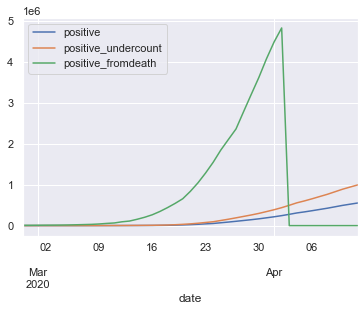

In [7]:
dfq.plot(x="date", y=["positive", "positive_undercount", "positive_fromdeath"])

,day_number,date,positive_predicted,positive,new_daily_positive,hospitalized_ident,icu_ident
44,45,2020-04-12,614259,551826.0,45296.0,49306,13148
45,46,2020-04-13,663161,0.0,48902.0,53232,14195
46,47,2020-04-14,715956,0.0,52795.0,57470,15325
47,48,2020-04-15,772954,0.0,56998.0,62045,16545
48,49,2020-04-16,834490,0.0,61536.0,66984,17862
49,50,2020-04-17,900925,0.0,66435.0,72317,19284
50,51,2020-04-18,972649,0.0,71724.0,78075,20820
51,52,2020-04-19,1050083,0.0,77434.0,84290,22477
52,53,2020-04-20,1133681,0.0,83598.0,91001,24266
53,54,2020-04-21,1223935,0.0,90254.0,98245,26198


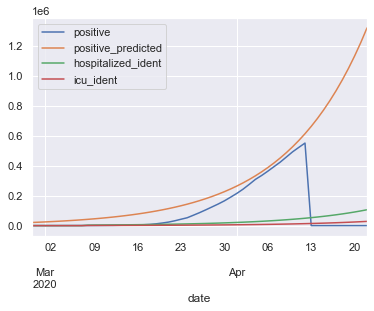

In [8]:
# Exponential Model
mp = ModelProjectionExponential()
d = mp.project(dfq, 10)
d.plot(x="date", y=["positive", "positive_predicted", "hospitalized_ident", "icu_ident"])
d.tail(11)

### SIR Fit

   direc: array([[-4.40644831e-03,  5.48357857e-04,  6.12651654e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-6.31171245e-04,  9.15467667e-05,  1.52296521e-01]])
     fun: 811563.2193466667
 message: 'Optimization terminated successfully.'
    nfev: 366
     nit: 7
  status: 0
 success: True
       x: array([0.25539066, 0.11118972, 5.10722736])
######################################################################
Day 0 = 2020-02-18 00:00:00  (today=45)
Doubling time is about 2.71 days
Recovery time is about 6.23 days
Estimated initial infection was order of 5,107 poeple


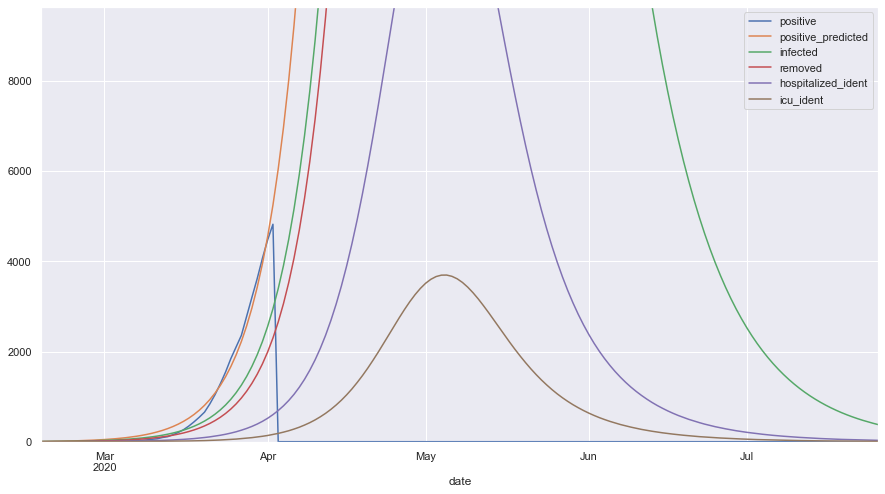

In [9]:
N=350000 
x0 = (0.25749545, 0.10952173, 3.17810689)  # beta, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR()
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

### SIR4: Try Varying beta as part of the model

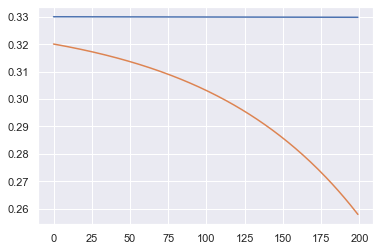

In [10]:
def g(alpha, beta0, t):
    return beta0 - alpha * t

def h(alpha, beta0, t):
    return beta0 - np.log(alpha) * alpha ** t

t = np.arange(0, 200, 1)
plt.plot(t, g(.000001, .33, t))
plt.plot(t, h(1.01, .33, t))
plt.show()

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[-8.60788557e-07,  6.45185587e-04,  3.84327504e-03,
         1.90401550e-02],
       [-1.45304484e-05, -4.83560561e-03,  6.64162805e-04,
        -1.99159086e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-8.73576678e-08,  1.56556694e-04,  5.98553116e-04,
         3.14394820e-03]])
     fun: 34781.998734176675
 message: 'Optimization terminated successfully.'
    nfev: 1737
     nit: 29
  status: 0
 success: True
       x: array([3.01879944e-05, 7.12760130e-01, 4.89006971e-01, 2.17725247e-01])
######################################################################
Day 0 = 2020-02-18 00:00:00  (today=45)
Doubling time is about 2.71 days
Recovery time is about 1.42 days
Estimated initial infection was order of 217 poeple


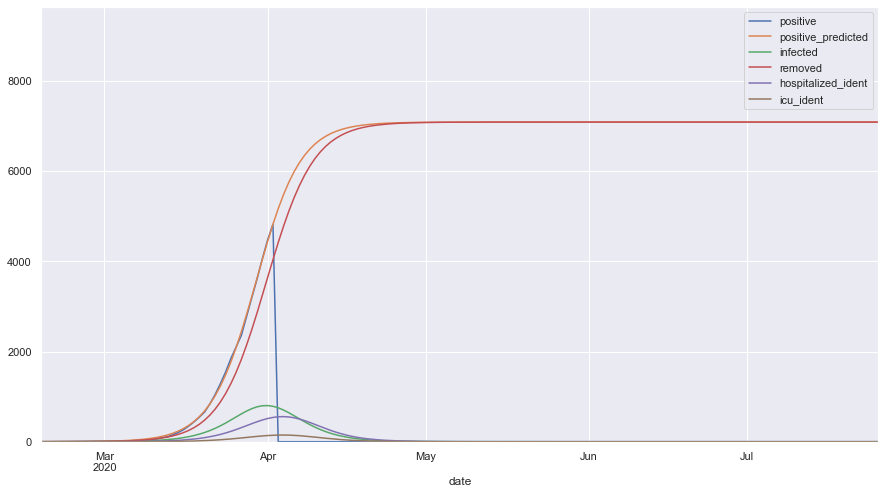

In [11]:
N=350000 
x0 = (0.01313296, 0.87278724, 0.33722395, 0.01900052)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

In [12]:
dfw, wsl = get_dataset_df_from_files()
dfw.head()

,Entity,state,Date,positive,death,daily_new_death,date,last_update,daily_new_positive
0,Afghanistan,AFG,"Dec 31, 2019",0,0,0,2019-12-31,2020-04-13 16:04:29.707358,NaN
1,Afghanistan,AFG,"Jan 1, 2020",0,0,0,2020-01-01,2020-04-13 16:04:29.707358,0.0
2,Afghanistan,AFG,"Jan 2, 2020",0,0,0,2020-01-02,2020-04-13 16:04:29.707358,0.0
3,Afghanistan,AFG,"Jan 3, 2020",0,0,0,2020-01-03,2020-04-13 16:04:29.707358,0.0
4,Afghanistan,AFG,"Jan 4, 2020",0,0,0,2020-01-04,2020-04-13 16:04:29.707358,0.0


/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[ 1.85714279e-03, -6.11977669e-04, -1.36874026e-01],
       [ 3.76031894e-03, -3.07355591e-03, -1.07270148e+00],
       [ 1.09752304e-03, -2.33307254e-04, -5.75877021e-02]])
     fun: 3022445.0803815443
 message: 'Optimization terminated successfully.'
    nfev: 493
     nit: 11
  status: 0
 success: True
       x: array([0.22506473, 0.14483626, 0.47754992])
######################################################################
Day 0 = 2020-02-18 00:00:00  (today=104)
Doubling time is about 3.08 days
Recovery time is about 4.79 days
Estimated initial infection was order of 477 poeple


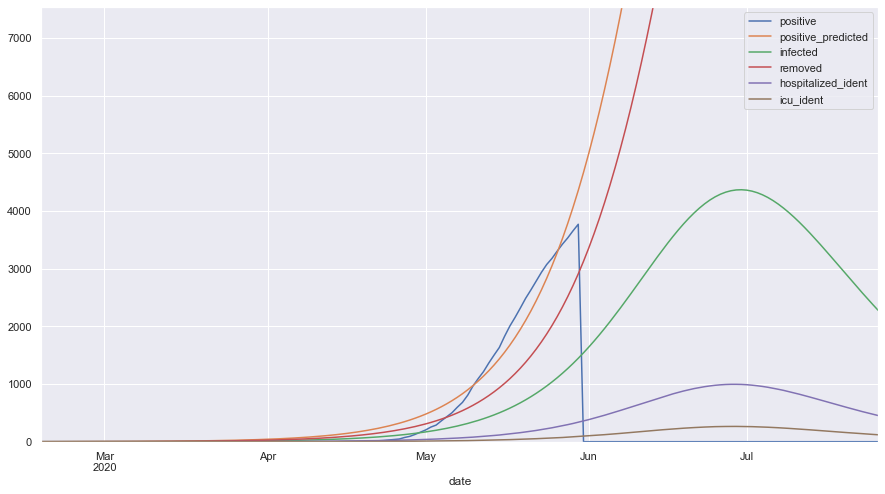

In [13]:
dfq = get_state_df(dfw, "ITA")
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq)
N=60000 
R0=0
x0 = (0.33821616, 0.15247499, 2.6568561)
sf = SIR()
c = ccd.fit_series/1000
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

   direc: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
     fun: 57296.529733776886
 message: 'Optimization terminated successfully.'
    nfev: 101
     nit: 1
  status: 0
 success: True
       x: array([4.13323272e-05, 7.42328302e-01, 5.71938250e-01, 2.09356295e-04])
######################################################################
Day 0 = 2019-12-21 00:00:00  (today=104)
Doubling time is about 3.08 days
Recovery time is about 1.21 days
Estimated initial infection was order of 0 poeple


/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


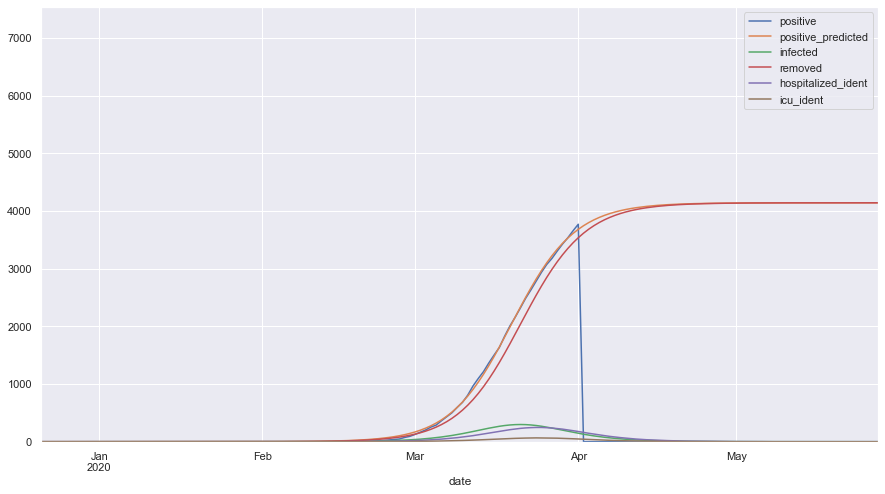

In [14]:
N=60000 
x0 = (4.13379338e-05, 7.42328935e-01, 5.71938181e-01, 2.09353947e-04)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

   direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: 2894880.5807542372
 message: 'Optimization terminated successfully.'
    nfev: 57
     nit: 1
  status: 0
 success: True
       x: array([0.22627354, 0.14456802, 0.43212415])
######################################################################
Day 0 = 2019-12-21 00:00:00  (today=104)
Doubling time is about 3.06 days
Recovery time is about 4.79 days
Estimated initial infection was order of 432 poeple


/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


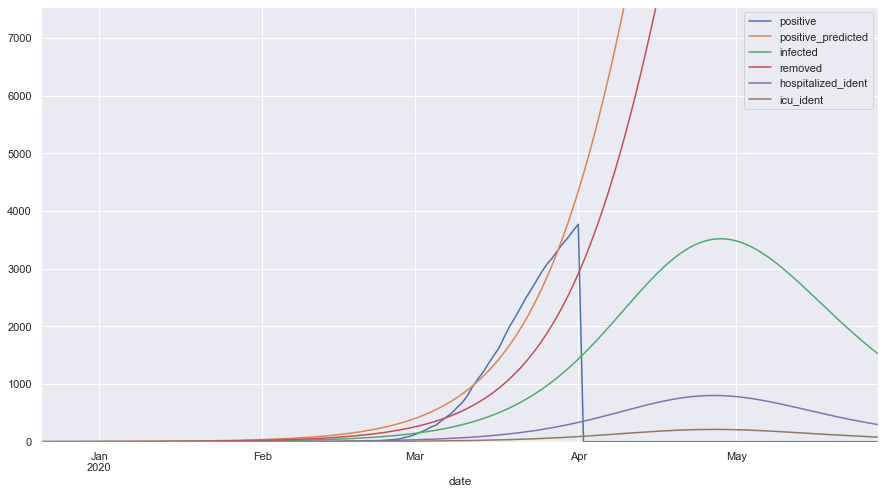

In [15]:
dfq = get_state_df(dfw, "ESP")
ccd = CurrentCasesFromDeaths()
dfq = ccd.add_positive_estimate(dfq)
N=47000
R0=0
x0 = (0.2262658 , 0.14456682, 0.43210381 )
sf = SIR()
(N, I0, R0, beta, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])

/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


   direc: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
     fun: 44997.82422493191
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 1
  status: 0
 success: True
       x: array([6.23347789e-05, 7.62580286e-01, 5.41117359e-01, 1.10624820e-06])
######################################################################
Day 0 = 2019-12-21 00:00:00  (today=104)
Doubling time is about 3.06 days
Recovery time is about 1.28 days
Estimated initial infection was order of 0 poeple


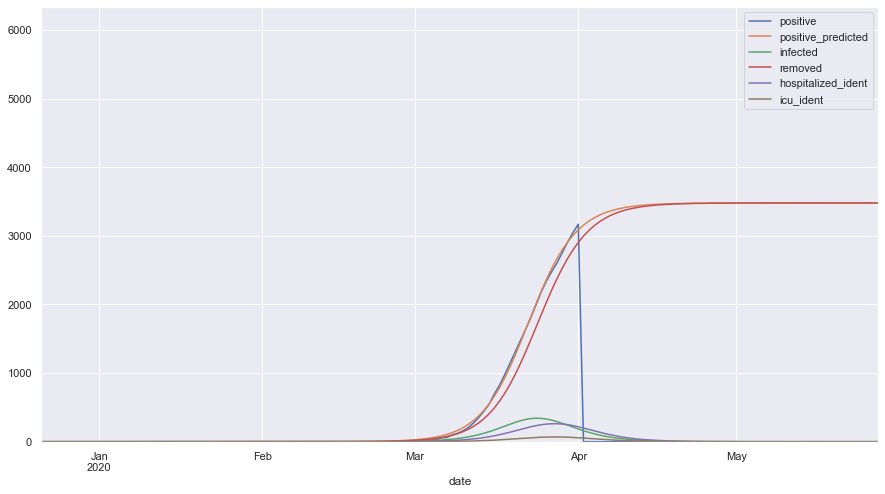

In [16]:
N=47000 
x0 = (6.23470525e-05, 7.62581143e-01, 5.41117221e-01, 1.10624820e-06)  # alpha, beta0, gamma, I0
c = ccd.fit_series/1000
start_date = dfq.date.values[0] - pd.Timedelta(days=ccd.shift)
sf = SIR4()
(N, I0, R0, beta0, alpha, gamma) = sf.SIRFitter(c, N, x0)
print("#"*70)
print("Day 0 = {}  (today={})".format(start_date,
                            (pd.Timestamp.now() - dfq.date.values[0]).days + cc.shift))
print("Doubling time is about {:.2f} days".format(np.log(2)/beta))
print("Recovery time is about {:.2f} days".format(np.log(2)/gamma))
print("Estimated initial infection was order of {:,} poeple".format(int(1000*I0)))
df = sf.project(c, 160, params={"SIR": (N, I0, R0, beta0, alpha, gamma), "start_date": start_date})
df.plot(x="date", 
        y=["positive", "positive_predicted", "infected", "removed", "hospitalized_ident", "icu_ident"], 
        figsize=[15, 8], ylim=[0, 2*np.max(c)])